In [9]:
import importlib
import datetime
import mapplotting
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import cartopy
import pandas
import xarray
import matplotlib
#from GliderTools import glidertools as gt
import glidertools as gt
import matplotlib.dates as mdates
import string
import dictionaries
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple
import cartopy.crs as ccrs
import geopandas as gp
import matplotlib.ticker as mticker
from matplotlib.offsetbox import OffsetImage, AnnotationBbox


pdates = [np.datetime64('2022-10-06'), 
          np.datetime64('2022-10-15'),
          np.datetime64('2022-10-30'),
          np.datetime64('2022-11-16'),
          np.datetime64('2022-12-01'),
          np.datetime64('2022-12-15'),
          np.datetime64('2022-12-30')]
"""
pdates = [np.datetime64('2022-10-05T16'), 
          np.datetime64('2022-10-06'),
          np.datetime64('2022-10-07'),
          np.datetime64('2022-11-08'),
          #np.datetime64('2022-12-01'),
          #np.datetime64('2022-12-15'),
          #np.datetime64('2022-12-30')
         ]
"""
from download_glider_data import utils
#from GliderTools import glidertools as gt

dataset_ids = dictionaries.timelines['NS_methane_sensor'][:]
dataset_ids = ['nrt_'+dataset_id for dataset_id in dataset_ids]
datasets_dict = utils.download_glider_dataset(dataset_ids, 
        )
datasets_list = [gt.load.voto_seaexplorer_dataset(ds) for ds in [*datasets_dict.values()]]
dsg = gt.load.voto_concat_datasets(datasets_list)

def create_1a(fig, ax):
    import matplotlib.patheffects as pe
    import cartopy.feature as cfeature
    
    def create_map_figure(fig, ax, zoomin=False, cbar=False):
        pc, ax, gl = mapplotting.plot_concentrations_map(fig, ax, bathy=True, 
                                                         zoomin=zoomin, 
                                                         cbar=False,
                                                         gtrajectory=True,
                                                         biglabels=False)
        return fig, ax, pc, gl

    importlib.reload(mapplotting)
    df_helcom = gp.read_file("../data/input/_ags_HELCOM_subbasins_2022_level21/HELCOM_subbasins_2022_level2.shp")
    secondround = dict(showmodel=True, zoomin=False)

    fig, ax, pc, gl = create_map_figure(fig, ax, zoomin=False)
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.xlabel_style = {'color':'k', 'rotation':0}
    gl.xlocator = mticker.FixedLocator([11, 20])

    mapplotting.plot_helcom(ax, df_helcom)
    mapplotting.plot_pipelines(ax)
    
    df_ferry = pandas.read_csv(
    '../data/input/IOW_Ferry_box/IOW_SOOP_Finnmaid_CH4_data_Rehder_Bittig_Glockzin_for_VOTO/'
    'IOW_SOOP_Finnmaid_CH4_data_Rehder_Bittig_Glockzin_for_DLR.txt')
    df_ferry['time'] = pandas.to_datetime(df_ferry['MatlabTime']-719529, unit='D')
    df_ferry = df_ferry.dropna()
    ax.plot(df_ferry.Lon[6000:8000], 
            df_ferry.Lat[6000:8000], 
            transform=ccrs.PlateCarree(),
            color='red')

    vmin=1e-9
    vmax=1e-5

    legend_elements = [
        Line2D([0], [0], color='w', ls='-', 
            path_effects=[pe.Stroke(linewidth=5, foreground='k'), pe.Normal()],
            lw=2, label='Glider observation transect'),
        Line2D([0], [0], marker='X', color='w',
            markerfacecolor='orange', markersize=10, label='Methane leak location'),
        Line2D([0], [0], color='lightgrey', 
            lw=4, label='Nordstream pipeline (approx)'),
        Line2D([0], [0], color='red', 
            lw=1.5, label='SPOOP transect'),
        Patch(facecolor=(1,1,1,0), edgecolor='blue',
                         label='MPA', hatch='////'),
        Patch(facecolor='burlywood', #edgecolor='blue',
                         label='Land', ),#hatch='////'),
        Patch(facecolor='lavender',
                         label='Sea (<50 m deep)'),
        Patch(facecolor='lightsteelblue', 
                         label='Sea (>50 m deep)',) #hatch='////')
    ]
    ax.legend(handles=legend_elements, loc='lower right', framealpha=1.,
              fontsize=8, handlelength=1.5).set_zorder(100)
    return ax


https://erddap.observations.voiceoftheocean.org/erddap/tabledap/nrt_SEA070_M13.html?
https://erddap.observations.voiceoftheocean.org/erddap/tabledap/nrt_SEA070_M14.html?
https://erddap.observations.voiceoftheocean.org/erddap/tabledap/nrt_SEA070_M15.html?
https://erddap.observations.voiceoftheocean.org/erddap/tabledap/nrt_SEA056_M54.html?
https://erddap.observations.voiceoftheocean.org/erddap/tabledap/nrt_SEA056_M55.html?
https://erddap.observations.voiceoftheocean.org/erddap/tabledap/nrt_SEA056_M56.html?
https://erddap.observations.voiceoftheocean.org/erddap/tabledap/nrt_SEA056_M57.html?


In [10]:
# load Ferry box data in nmol/l
def create_1b(fig, ax):
    vmin=1
    vmax=1e4
    df_ferry = pandas.read_csv(
        '../data/input/IOW_Ferry_box/IOW_SOOP_Finnmaid_CH4_data_Rehder_Bittig_Glockzin_for_VOTO/'
        'IOW_SOOP_Finnmaid_CH4_data_Rehder_Bittig_Glockzin_for_DLR.txt')
    df_ferry['time'] = pandas.to_datetime(df_ferry['MatlabTime']-719529, unit='D')
    df_ferry = df_ferry.dropna()
    df_ferry.drop(['MatlabTime', 'ExcelTime', 'Day', 'Month', 'Year', 'Hour', 'Minute'], axis=1)
    df_ferry = df_ferry[(df_ferry.Lon>14) & (df_ferry.Lon<18)]
    df_ferry[['Lon', 'cCH4is_nmol_l_corr', 'time']]
    cc = ax.scatter(df_ferry.time, df_ferry.Lon, c=df_ferry.cCH4is_nmol_l_corr, s=15,
                norm=matplotlib.colors.LogNorm(
                            vmin=vmin,
                            vmax=vmax,
                ),
                cmap=matplotlib.cm.Reds,
           )
    
    ax.set_ylabel('Longitude ⁰E')
    cb = plt.colorbar(cc, pad=0.02, ax=ax, fraction=0.05, label='Methane conc. [nM]')
    
    # Change date format
    datefmt = mdates.DateFormatter('%Y-%b')
    ax.xaxis.set_major_formatter(datefmt)

    # Set the Major locator for x-axis to month Jan and August
    # and minor locator as month between these major locators
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_minor_locator(mdates.DayLocator(bymonthday=15))
    
    ax.scatter(dsg.time, dsg.longitude, color='k', s=1)
    legend_elements = [Line2D([0], [0], color='k', 
                             lw=1.5, label='Glider longitude')]
    ax.legend(handles=legend_elements, loc='upper right', framealpha=1.,
              fontsize=12, handlelength=1.5).set_zorder(100)
    
    return fig, ax


In [11]:
def create_1d(fig, ax):
    vmin = 5
    vmax = 5e3
    ds = xarray.open_mfdataset('../data/input/methane_processed_bastien/timeseries_output.nc')
    ds['meantime'] = gt.utils.time_average_per_dive(ds.profile_num, ds.time)
    dsud = ds.where(ds.profile_num.values%2==1)
    ax = gt.plot(dsud.meantime, 
            dsud.depth, 
            dsud.methane*1e-6*1e9, 
            norm=matplotlib.colors.LogNorm(
                                vmin=vmin,
                                vmax=vmax
                      ),
            cmap=matplotlib.cm.Reds,
            ax=ax,
            robust=False,)
    
    ax.cb.set_label('Methane conc. [nM]')
    for mydate in pdates:
        ax.scatter(x=mydate, y=70, marker="^",  s=500,)
    
    [tick.set_rotation(0) for tick in ax.get_xticklabels()]
    
    # now load and plot the mld and lcline
    dfmld = pandas.read_csv('rf_mld.csv', parse_dates=True)
    dfmld['time'] = pandas.to_datetime(dfmld.time)
    dflcline = pandas.read_csv('rf_lcline.csv')
    dflcline['time'] = pandas.to_datetime(dflcline.time)
    dftcline = pandas.read_csv('rf_tcline.csv')
    dftcline['time'] = pandas.to_datetime(dftcline.time)

    ax.plot(dftcline.time, 
            dftcline.tcline.rolling(window=10, center=True).mean(), 
            color='k', 
            label='thermocline',
            lw=1)
    ax.plot(dflcline.time, 
            dflcline.lcline.rolling(window=10, center=True).mean(), 
            color='tab:blue', 
            label='halocline',
            lw=1)

    ax.legend(loc='upper right')
    return fig, ax

In [12]:
def create_1c(fig, ax):
    ds = xarray.open_mfdataset('../data/input/methane_processed_bastien/timeseries_output.nc')
    ds['meantime'] = gt.utils.time_average_per_dive(ds.profile_num, ds.time)
    dsud = ds.where(ds.profile_num.values%2==1).dropna(dim='time', subset=['depth'])
    dfud = dsud.to_pandas()
    df_ferry = pandas.read_csv(
        '../data/input/IOW_Ferry_box/IOW_SOOP_Finnmaid_CH4_data_Rehder_Bittig_Glockzin_for_VOTO/'
        'IOW_SOOP_Finnmaid_CH4_data_Rehder_Bittig_Glockzin_for_DLR.txt')
    df_ferry['time'] = pandas.to_datetime(df_ferry['MatlabTime']-719529, unit='D')
    df_ferry_groups = df_ferry.groupby(df_ferry.time.dt.date).max()

    p = dsud.sel(time=pdates, method='nearest')
    pnumbers = p.profile_num.values
    labeltupels = []
    for index, pnumber in enumerate(pnumbers):
        dfp = dfud[dfud.profile_num==pnumber]
        label_glprofile, = ax.plot(dfp.methane*1e-6*1e9, -dfp.depth, label=dfp.index.date[0])
        
        x = df_ferry_groups.to_xarray().sel(
            time=pdates[index], method='nearest').cCH4is_nmol_l_corr
        label_surfaceferry = ax.scatter(x, 0)
        labeltupels.append((label_glprofile, label_surfaceferry))
    ax.set_xlim(1, None)
    ax.set_ylabel('Depth [m]')
    ax.set_xscale('log')
    ax.set_xlabel('Methane conc. [nM]')
    ax.grid()
    
    l = ax.legend(labeltupels, pdates, numpoints=1,
              handler_map={tuple: HandlerTuple(ndivide=None)},
              loc='upper left', fontsize=10, title='Glider, SPOOP',
              title_fontsize=10)


/home/coffee/micromamba/envs/analysis/lib/python3.11/site-packages/glidertools/helpers.py:97: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  xds = xr.DataArray(
/home/coffee/micromamba/envs/analysis/lib/python3.11/site-packages/glidertools/helpers.py:97: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the 

Found tiles [PosixPath('/home/coffee/VOTO/data/bathymetry/emodnet_baltic/D5_2020.nc'), PosixPath('/home/coffee/VOTO/data/bathymetry/emodnet_baltic/C7_2020.nc'), PosixPath('/home/coffee/VOTO/data/bathymetry/emodnet_baltic/D6_2020.nc'), PosixPath('/home/coffee/VOTO/data/bathymetry/emodnet_baltic/C5_2020.nc'), PosixPath('/home/coffee/VOTO/data/bathymetry/emodnet_baltic/C6_2020.nc'), PosixPath('/home/coffee/VOTO/data/bathymetry/emodnet_baltic/D7_2020.nc')]
Found 2 tiles with relevant data: [PosixPath('/home/coffee/VOTO/data/bathymetry/emodnet_baltic/D5_2020.nc'), PosixPath('/home/coffee/VOTO/data/bathymetry/emodnet_baltic/D6_2020.nc')]
data in one row, patching lon


/home/coffee/micromamba/envs/analysis/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/coffee/micromamba/envs/analysis/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:463: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '


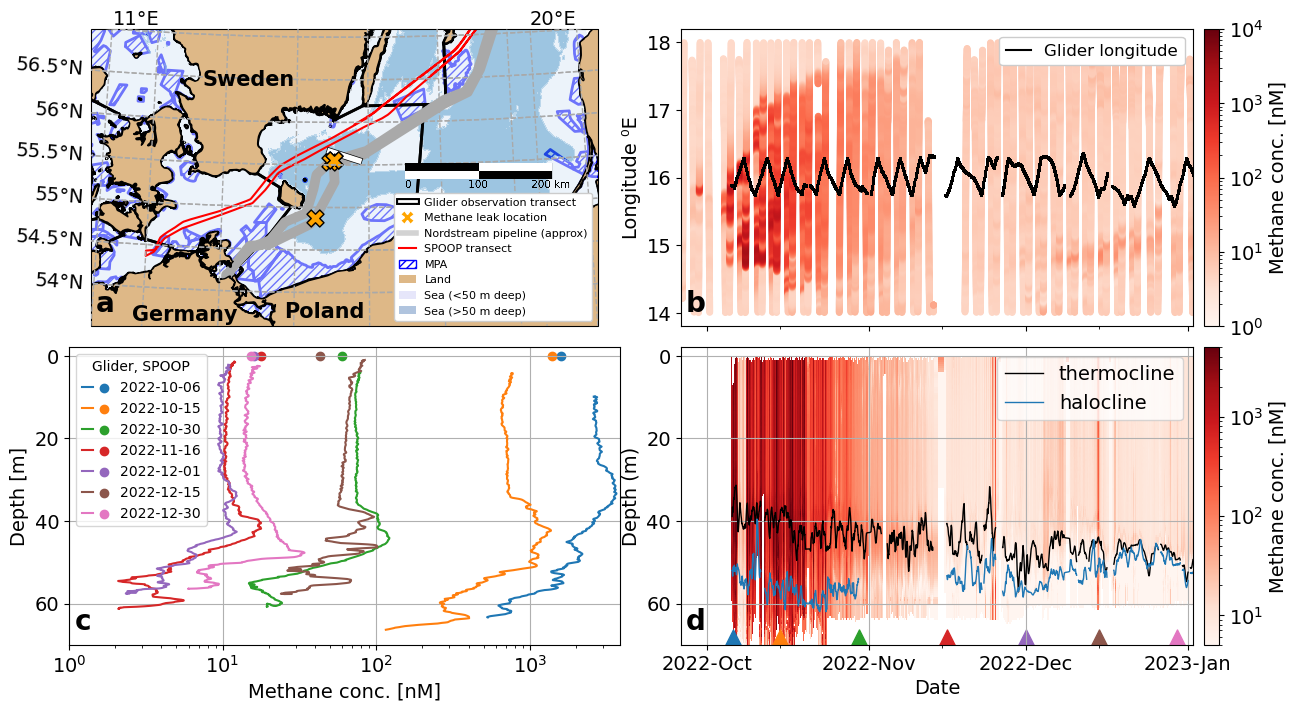

In [15]:
S_lim = 53.5
N_lim = 57
W_lim = 11
E_lim = 21
pc = cartopy.crs.PlateCarree()
coord = cartopy.crs.AzimuthalEquidistant(central_longitude=np.mean((W_lim, E_lim)),
                                  central_latitude=np.mean((S_lim, N_lim)))

plt.rcParams.update({'font.size': 14})
fig = plt.figure(figsize=[15,8])
gs = fig.add_gridspec(nrows=10, ncols=10, hspace=0.5, wspace=1)
ax0 = fig.add_subplot(gs[0:5,0:5], projection=coord)
ax3 = fig.add_subplot(gs[5:,5:10])
ax1 = fig.add_subplot(gs[0:5,5:], sharex=ax3)
ax2 = fig.add_subplot(gs[5:,0:5])

plt.setp(ax1.get_xticklabels(), visible=False)

create_1b(fig, ax1)
create_1c(fig, ax2)
create_1d(fig, ax3)

ax1.set_xlabel(None)
ax3.set_xlim(np.datetime64('2022-09-26'), np.datetime64('2023-01-02'))
ax2.set_yticklabels(labels=['80','60', '40', '20', '0'])
ax3.grid()
ax3.set_ylim(70,-2)
ax2.set_ylim(-70,2)

ax0 = create_1a(fig, ax0)
ax0.text(11.8,53.6,'Germany',fontsize=15,weight='bold', transform=ccrs.PlateCarree(), zorder=200)
ax0.text(14.8,53.7,'Poland',fontsize=15,weight='bold', transform=ccrs.PlateCarree(), zorder=200)
ax0.text(13,56.4,'Sweden',fontsize=15,weight='bold', transform=ccrs.PlateCarree(), zorder=200)
ax0.set_extent((W_lim, E_lim, S_lim, N_lim), crs=pc)
df_helcom = gp.read_file("../data/input/_ags_HELCOM_MPAs_2019_2/HELCOM_MPAs_2019_2.shp")

crs = ccrs.AzimuthalEquidistant()
crs_proj4 = crs.proj4_init
df_helcom = df_helcom.to_crs(crs_proj4)
ax0.add_geometries(df_helcom.sort_values('Shape_Area', ascending=False).geometry,
                  crs=crs,
                  zorder=0,
                  hatch='////',
                  edgecolor='blue',
                  linewidth=2,
                  #color=acolors,
                  facecolor=(1,1,1,0))

for n, ax in enumerate([ax0, ax1, ax2, ax3]):
    ax.text(0.01, 0.05, string.ascii_lowercase[n], transform=ax.transAxes, 
            size=20, weight='bold', zorder=100)

arr_img = plt.imread("../figures/scalebar4.png")
im = OffsetImage(arr_img, zoom=.12)
#ab = AnnotationBbox(im, (0.2, 0.88), xycoords='axes fraction', box_alignment=(0,0), frameon=False)
#ax0.add_artist(ab).set_zorder(200)
ab1 = AnnotationBbox(im, (0.62, 0.45), xycoords='axes fraction', box_alignment=(0,0), frameon=False)
# ab1 = AnnotationBbox(im, (0.62, 0.45), xycoords='axes fraction', box_alignment=(0,0), frameon=False)

ax0.add_artist(ab1).set_zorder(200)

plt.savefig('../figures/rf_Figure1.png', #transparent=True, 
            dpi=300)

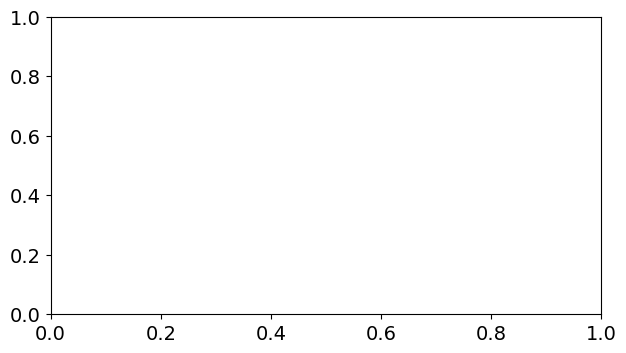

In [14]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
fig = plt.figure(figsize=[15,8])
gs = fig.add_gridspec(nrows=10, ncols=10, hspace=0.5, wspace=1)
ax2 = fig.add_subplot(gs[5:,0:5])

#plt.show()

In [8]:
# used in text nano-moles l-1
# used in figure moles l-1
# conversion factor: *1e9
import geopandas as gp
df_helcom = gp.read_file("../data/input/_ags_HELCOM_subbasins_2022_level21/HELCOM_subbasins_2022_level2.shp")
#secondround = dict(showmodel=True, zoomin=False)
#fig, ax, pc, gl = create_map_figure(fig, ax, zoomin=False)
#gl.xlabels_top = True
#gl.xlabels_bottom = False
#gl.xlabel_style = {'color':'k', 'rotation':0}

mapplotting.plot_helcom(ax, df_helcom)

AttributeError: 'Axes' object has no attribute 'add_geometries'

In [ ]:


df_helcom